In [341]:
!pip3 install neurolab
!pip3 install neupy

In [342]:
import math
import random

import numpy as np
import pandas as pd
from numpy import matlib
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import neurolab as nl
from sklearn.metrics import mean_squared_error
from neupy import algorithms

In [343]:
h = 0.025

r = [3, 0, 5]

In [344]:
k1 = np.linspace(0, 1, int(1 / h), endpoint=True)
k2 = np.linspace(1.12, 3.6, int(3.6 / h), endpoint=True)

In [345]:
t1 = np.ones(len(k1)) * (-1)
t2 = np.ones(len(k2))

In [346]:
def g(k):
  return np.sin(np.sin(k) * k * k - k)

p1 = np.sin(math.pi * 4 * k1)

p2 = g(k2)

In [347]:
p2 = p2.reshape(1, p2.shape[0])
t2 = t2.reshape(1, t2.shape[0])

In [348]:
P = np.concatenate((matlib.repmat(p1, 1, r[0]), p2, matlib.repmat(p1, 1, r[1]), p2, matlib.repmat(p1, 1, r[2]), p2), axis=1).reshape(-1, 1)

T = np.concatenate((matlib.repmat(t1, 1, r[0]), t2,matlib.repmat(t1, 1, r[1]), t2, matlib.repmat(t1, 1, r[2]), t2), axis=1).reshape(-1, 1)

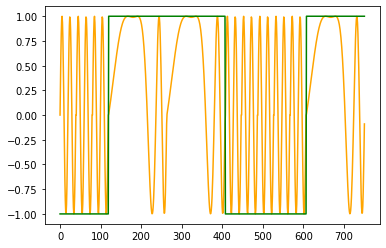

In [349]:
plt.plot(P.reshape(P.shape[0]), color='orange')
plt.plot(T.reshape(T.shape[0]), color='green')

In [350]:
#сеть Элмана
net = nl.net.newelm([[-10, 10]], [8, 1], [nl.trans.TanSig(), nl.trans.TanSig()])
net.layers[0].np['w'][:] = 1
net.layers[0].np['b'][:] = 0
net.init()

In [351]:
error = net.train(P, T, epochs=100, show=50, goal=0.0001)

Epoch: 50; Error: 0.849936753739409;
Epoch: 100; Error: 0.7980484635874092;
The maximum number of train epochs is reached


In [352]:
output = net.sim(P)

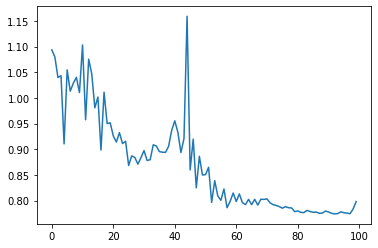

In [353]:
plt.plot(error)

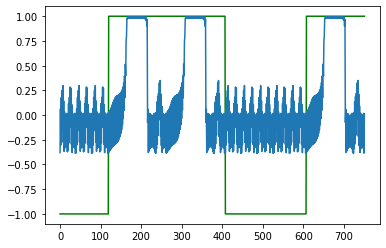

In [354]:
plt.plot(T.reshape(T.shape[0]), color='green')
plt.plot(output.reshape(output.shape[0]))

In [355]:
output[output >= 0] = 1.0
output[output < 0] = -1.0

In [356]:
print(mean_squared_error(T, output))

1.4734042553191489


In [357]:
#проверка: изменим R
r = [15, 0, 5]

P = np.concatenate((matlib.repmat(p1, 1, r[0]), p2, matlib.repmat(p1, 1, r[1]), p2, matlib.repmat(p1, 1, r[2]), p2), axis=1).reshape(-1, 1)

T = np.concatenate((matlib.repmat(t1, 1, r[0]), t2,matlib.repmat(t1, 1, r[1]), t2, matlib.repmat(t1, 1, r[2]), t2), axis=1).reshape(-1, 1)

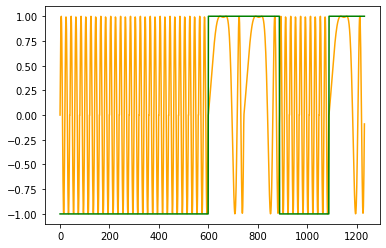

In [358]:
plt.plot(P.reshape(P.shape[0]), color='orange')
plt.plot(T.reshape(T.shape[0]), color='green')

In [359]:
output2 = net.sim(P)

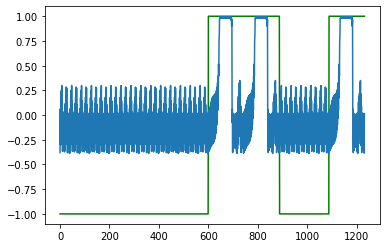

In [360]:
plt.plot(T.reshape(T.shape[0]), color='green')
plt.plot(output2.reshape(output2.shape[0]))

In [361]:
output2[output2 >= 0] = 1.0
output2[output2 < 0] = -1.0
print(mean_squared_error(T, output2))

1.5616883116883118


In [ ]:
p3 = [
                0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
                0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
                0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 0, 1, 1, 1, 1, 1, 1, 0, 0]

p0 = [
               0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
               0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
               0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

p4 = [
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0]

In [ ]:
#сеть Хопфилда
hop3 = np.matrix(p3)
hop0 = np.matrix(p0)
hop4 = np.matrix(p4)

data = np.concatenate([hop3, hop0, hop4], axis=0)

In [ ]:
hopf = algorithms.DiscreteHopfieldNetwork(mode='async', n_times=600)
hopf.train(data)

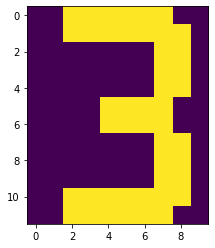

In [ ]:
plt.imshow(hopf.predict(hop3).reshape(12,10), interpolation='nearest')

In [ ]:
def noise(img, noise_percent):
    limit = img.shape[1]
    tmp = img.T
    
    for i in range(noise_percent):
        pos = np.random.randint(1, limit, 1)[0]
        tmp[pos] *= 0
    res = tmp.T
    return res

In [ ]:
noise(hop0, 20)

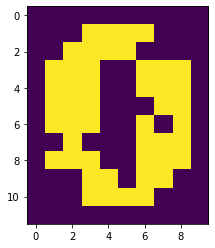

In [ ]:
plt.imshow(hop0.reshape(12,10), interpolation='nearest')

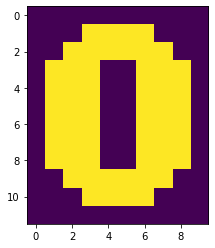

In [ ]:
plt.imshow(hopf.predict(hop0).reshape(12,10), interpolation='nearest')
plt.show()

In [ ]:
noise(hop4, 30)

matrix([[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
         1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
         1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
         0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]])

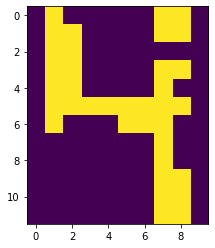

In [ ]:
plt.imshow(hop4.reshape(12,10), interpolation='nearest')

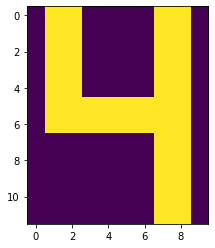

In [ ]:
plt.imshow(hopf.predict(hop4).reshape(12,10), interpolation='nearest')

In [ ]:
#сеть Хемминга
#сеть Хопфилда
h0 = []
for w in p0:
  if w == 0:
    h0.append(-1)
  else:
    h0.append(1)

h3 = []
for w in p3:
  if w == 0:
    h3.append(-1)
  else:
    h3.append(1)

h4 = []
for w in p4:
  if w == 0:
    h4.append(-1)
  else:
    h4.append(1)

h0 = np.array(h0)
h3 = np.array(h3)
h4 = np.array(h4)

In [ ]:
Q = 3
eps = 1 / (Q-1)

IW = np.array([h3.T, h0.T, h4.T])
patterns = np.array([h3, h0, h4])
b = (12*10) * np.ones((Q, 1))
a = np.zeros((Q, Q))
for i in range(Q):
    a[i] = IW[i] @ patterns[i] + b[i]
    
LW = np.eye(Q)
LW[LW == 0.0] = -eps

network = nl.net.newhop(a, max_init=700)
network.layers[0].np['w'][:] = LW
network.layers[0].np['b'][:] = 0

In [ ]:
def draw_predict(h):
  A = IW @ h + b
  res = network.sim(A)
  answer_class = np.argmax(res[0])
  number = patterns[answer_class]
  number[number == -1] = 0
  plt.imshow(number.reshape(12,10), interpolation='nearest')

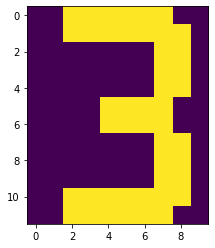

In [ ]:
draw_predict(h3)

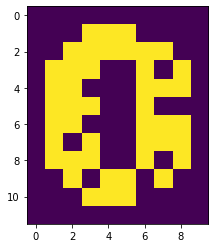

In [ ]:
p0 = noise(np.matrix(p0), 20)
plt.imshow(p0.reshape(12,10), interpolation='nearest')

In [ ]:
h0 = p0
h0[h0 == 0] = -1

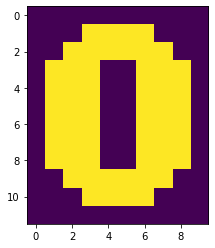

In [ ]:
draw_predict(np.squeeze(np.asarray(h0)))

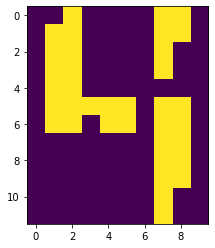

In [ ]:
p4 = noise(np.matrix(p4), 30)
plt.imshow(p4.reshape(12,10), interpolation='nearest')

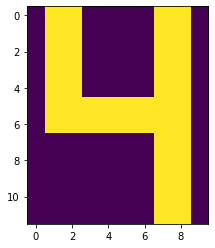

In [ ]:
h4 = p4
h4[h4 == 0] = -1
draw_predict(np.squeeze(np.asarray(h4)))